# **ALGORITHM:PASSIVE AGRESSIVE CLASSIFIER**

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
#loading dataset
from google.colab import files
uploaded=files.upload()


Saving train.csv to train.csv


In [4]:
news_data = pd.read_csv('train.csv')

# ***DATA PREPROCESSING***

DATA CLEANING

In [5]:
news_data.head()
news_data.shape
# counting the number of missing values in the dataset
news_data.isnull().sum()



id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [6]:
# replacing the null values with empty string
news_data = news_data.fillna('')
# checking the number of missing values in the dataset
news_data.isnull().sum()


id        0
title     0
author    0
text      0
label     0
dtype: int64

In [7]:
# Drop duplicate rows
news_data = news_data.drop_duplicates()


STEMMING

In [8]:
news_data['content'] = news_data['author']+news_data['title']
port_stem = PorterStemmer()
def stemming(content):
    review = re.sub('[^a-zA-Z]',' ',content)
    review = review.lower()
    review = review.split()
    review = [port_stem.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    return review
#reducing dataset size
news_datadata = news_data.sample(n=500, random_state=42)
news_data['content'] = news_data['content'].apply(stemming)

# ***FEATURE ENGINEERING***

In [9]:
#separating the data and label
X = news_data['content'].values
Y = news_data['label'].values

In [10]:
#VECTORIZATION
vectorizer = TfidfVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)

# ***MODEL BUILDING***

In [11]:
#SPLITTING INTO TRAIN AND TEST DATSET
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X, Y, test_size=0.33, random_state=42)

WITH PACKAGE IMPLEMENTATION :



In [12]:
#IMPLEMENTING PASSIVE AGRESSIVE CLASSIFER
from sklearn import metrics
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(max_iter=10000)
linear_clf.fit(X2_train, Y2_train)
prediction2 = linear_clf.predict(X2_test)

In [13]:
#ENCLOSING CLASSIFIER INTO A FUNCTION
def PA(X):
    # Apply stemming to the input text
    X_new = stemming(X)

    # Vectorize the stemmed textvectorizer.fit(X)
    X = vectorizer.transform([X_new])

    # Make the prediction
    prediction = linear_clf.predict(X)
    if (prediction==0):
     print('The news is Real')
    else:
     print('The news is Fake')



In [14]:
#EXAMPLE USAGE
PA('India won  world cup 2024')

The news is Fake


WITHOUT PACKAGE IMPLEMENTATION


In [17]:
class PassiveAggressiveClassifierScratch:
    def __init__(self, max_iter=50):
        self.max_iter = max_iter
        self.w = None
        self.b = 0

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)

        for _ in range(self.max_iter):
            for i in range(n_samples):
                x_i = X[i].toarray()[0]  # Converting sparse matrix row to dense
                y_i = y[i]
                if y_i == 0:
                    y_i = -1  # Converting label 0 to -1 for binary classification
                condition = y_i * (np.dot(x_i, self.w) + self.b) <= 0
                if condition:
                    self.w += y_i * x_i
                    self.b += y_i

    def predict(self, X):
        predictions = []
        for i in range(X.shape[0]):
            x_i = X[i].toarray()[0]  # Converting sparse matrix row to dense
            pred = np.dot(x_i, self.w) + self.b
            if pred > 0:
                predictions.append(1)
            else:
                predictions.append(0)
        return np.array(predictions)

pac = PassiveAggressiveClassifierScratch(max_iter=50)
pac.fit(X2_train, Y2_train)

y_pred = pac.predict(X2_test)


In [18]:
#ENCLOSING CLASSIFIER IN FUNCTION
def predict_new_input(text, vectorizer, model):
    text = stemming(text)  # Apply the same preprocessing
    tfidf_text = vectorizer.transform([text])
    prediction = model.predict(tfidf_text)
    return 'REAL' if prediction[0] == 1 else 'FAKE'

In [19]:
# Example usage
new_input = "India won world cup 2024"
print(f'Prediction for new news input: {predict_new_input(new_input, vectorizer, pac)}')


Prediction for new news input: REAL


# ***MODEL EVALUATION***

PASSIVE AGRESSIVE WITH PACKAGES

In [20]:
report = classification_report(Y2_test, prediction2, target_names=['Fake', 'Real'])
print("CLASSIFICATION REPORT:\n", report)


CLASSIFICATION REPORT:
               precision    recall  f1-score   support

        Fake       0.98      0.97      0.97      3449
        Real       0.97      0.98      0.97      3415

    accuracy                           0.97      6864
   macro avg       0.97      0.97      0.97      6864
weighted avg       0.97      0.97      0.97      6864



Confusion Matrix:
 [[3346  103]
 [  78 3337]]


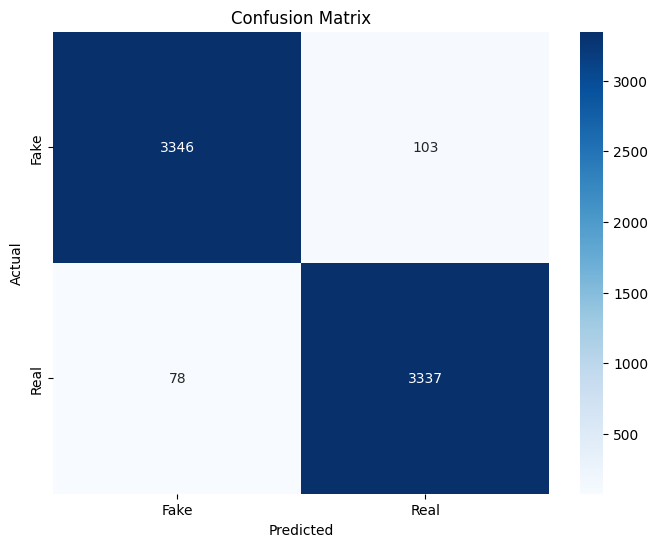

In [21]:
#CONFUSION MATRIX
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y2_test, prediction2)
print("Confusion Matrix:\n", cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


PASSIVE AGRESSIVE WITHOUT PACKAGE

In [22]:
report = classification_report(Y2_test, y_pred, target_names=['Fake', 'Real'])
print("CLASSIFICATION REPORT:\n", report)

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

        Fake       0.97      0.97      0.97      3449
        Real       0.97      0.97      0.97      3415

    accuracy                           0.97      6864
   macro avg       0.97      0.97      0.97      6864
weighted avg       0.97      0.97      0.97      6864



Confusion Matrix:
 [[3344  105]
 [ 115 3300]]


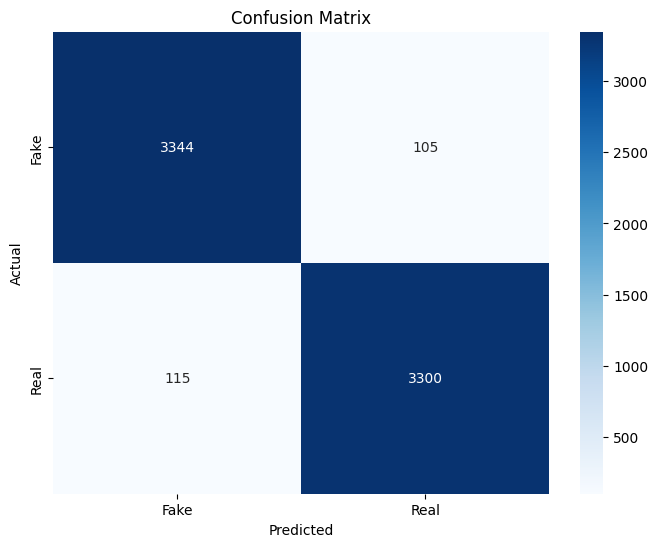

In [23]:
#CONFUSION MATRIX
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y2_test, y_pred)
print("Confusion Matrix:\n", cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()